# Model Fitness gym chain Machine Learning Forecast for customer churn

### Project description


<div class="paragraph">The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.</div>
<div class="paragraph">One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.</div>
<div class="paragraph">Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.</div>
<div class="paragraph">For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.</div>
<div class="paragraph">In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.</div>
<div class="paragraph">You should:</div>
<ul>
<li>Learn to predict the probability of churn (for the upcoming month) for each customer</li>
<li>Draw up typical user portraits: select the most outstanding groups and describe their main features</li>
<li>Analyze the factors that impact churn most</li>
<li>Draw basic conclusions and develop recommendations on how to improve customer service:
<ul>
<li>Identify target groups</li>
<li>Suggest measures to cut churn</li>
<li>Describe any other patterns you see with respect to interaction with customers</li>
</ul>
</li>
</ul>

### Step 1. Download the data

Step 1. Download the data
<div class="paragraph">Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:</div>
<ul>
<li><code class="code-inline code-inline_theme_light">'Churn'</code>&nbsp;&mdash; the fact of churn for the month in question</li>
<li>Current dataset fields:
<ul>
<li>User data for the preceding month
<ul>
<li><code class="code-inline code-inline_theme_light">'gender'</code></li>
<li><code class="code-inline code-inline_theme_light">'Near_Location'</code>&nbsp;&mdash; whether the user lives or works in the neighborhood where the gym is located</li>
<li><code class="code-inline code-inline_theme_light">'Partner'</code>&nbsp;&mdash; whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)</li>
<li><code class="code-inline code-inline_theme_light">Promo_friends</code>&nbsp;&mdash; whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)</li>
<li><code class="code-inline code-inline_theme_light">'Phone'</code>&nbsp;&mdash; whether the user provided their phone number</li>
<li><code class="code-inline code-inline_theme_light">'Age'</code></li>
<li><code class="code-inline code-inline_theme_light">'Lifetime'</code>&nbsp;&mdash; the time (in months) since the customer first came to the gym</li>
</ul>
</li>
</ul>
</li>
<li>Data from the log of visits and purchases and data on current membership status
<ul>
<li><code class="code-inline code-inline_theme_light">'Contract_period'</code>&nbsp;&mdash; 1 month, 3 months, 6 months, or 1 year</li>
<li><code class="code-inline code-inline_theme_light">'Month_to_end_contract'</code>&nbsp;&mdash; the months remaining until the contract expires</li>
<li><code class="code-inline code-inline_theme_light">'Group_visits'</code>&nbsp;&mdash; whether the user takes part in group sessions</li>
<li><code class="code-inline code-inline_theme_light">'Avg_class_frequency_total'</code>&nbsp;&mdash; average frequency of visits per week over the customer's lifetime</li>
<li><code class="code-inline code-inline_theme_light">'Avg_class_frequency_current_month'</code>&nbsp;&mdash; average frequency of visits per week over the preceding month</li>
<li><code class="code-inline code-inline_theme_light">'Avg_additional_charges_total'</code>&nbsp;&mdash; the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.</li>
</ul>
</li>
</ul>
<div class="paragraph">File path:&nbsp;<code class="code-inline code-inline_theme_light">/datasets/gym_churn_us.csv</code>.&nbsp;<a href="https://code.s3.yandex.net/datasets/gym_churn_us.csv" target="_blank" rel="noopener">Download the dataset</a>.</div>

In [1]:
#pip install "notebook>=5.3" "ipywidgets>=7.2"

In [2]:
#### imports
import pandas as pd
import scipy.stats as st
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
#### read data
path_local = 'C:/Users/Dana/Desktop/yandex/project11/'
path_platform = '/datasets/'
data = pd.read_csv(path_platform + 'gym_churn_us.csv')
data.columns = data.columns.str.lower()
data_for_hists = data.copy()

### Step 2. Carry out exploratory data analysis (EDA)

<ul>
<li>Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the&nbsp;<code class="code-inline code-inline_theme_light">describe()</code>&nbsp;method).</li>
<li>Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the&nbsp;<code class="code-inline code-inline_theme_light">groupby()</code>&nbsp;method).</li>
<li>Plot bar histograms and feature distributions for those who left (churn) and those who stayed.</li>
<li>Build a correlation matrix and display it.</li>
</ul>

#### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
data.groupby(['contract_period'])['contract_period'].count()/4000

contract_period
1     0.55175
6     0.20825
12    0.24000
Name: contract_period, dtype: float64

In [7]:
data.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
data.isnull().any()

gender                               False
near_location                        False
partner                              False
promo_friends                        False
phone                                False
contract_period                      False
group_visits                         False
age                                  False
avg_additional_charges_total         False
month_to_end_contract                False
lifetime                             False
avg_class_frequency_total            False
avg_class_frequency_current_month    False
churn                                False
dtype: bool

In [10]:
print(data.shape)
data.dropna(inplace = True)
print(data.shape)

(4000, 14)
(4000, 14)


Exploratory Data Analysis (EDA) sum:
- We have 4000 lines of customers data
- Almost equal number of Mans and Womans customers with mean age 29 years,
- Almost half of our customers have discont program due to they are an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 30% of the customers originally signed up through a "bring a friend" offer.
- 90% of the customers provided their phone numbers.
- 55% of the customers signed for 1 month, 20% for 6 months and 24% for 12 months contract period.
- 41% of the customers takes part in group sessions
- The total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc. is 146 dollars
- The average frequency of visits per week over the preceding month is 1.76
- The average frequency of visits per week over the customer's lifetime is 1.86

Data dosen't have any missing values or lines

#### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [11]:
(data.groupby(['churn'])['churn'].count()/4000)*100

churn
0    73.475
1    26.525
Name: churn, dtype: float64

In [12]:
data_churn1 = data[data['churn'] == 1]
(data_churn1.groupby(['lifetime'])['lifetime'].sum()/1061)*100

lifetime
0     0.000000
1    39.019793
2    29.594722
3    14.137606
4     8.671065
5     3.770028
6     2.262017
8     0.754006
9     0.848256
Name: lifetime, dtype: float64

26% of customers is churn.
60% of churn customers left in first two months.

In [13]:
data.groupby('churn')['month_to_end_contract','lifetime'].mean()

,month_to_end_contract,lifetime
churn,,
0,5.283089,4.711807
1,1.662582,0.990575


#### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [14]:
data_churn1 = data[data['churn'] == 1]
data_churn0 = data[data['churn'] == 0]

Text(0, 0.5, 'Number of customers left')

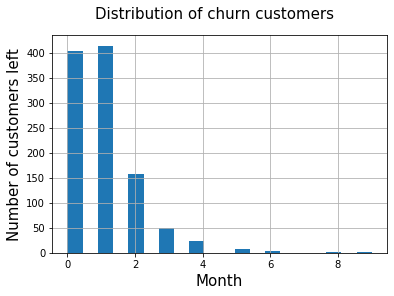

In [15]:
data_churn1['lifetime'].hist(bins=20)
plt.suptitle("Distribution of churn customers", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of customers left",fontsize=15)

Per represented Distribution of churn customers, the most people leave in first 2 months.

Text(0, 0.5, 'Number of customers')

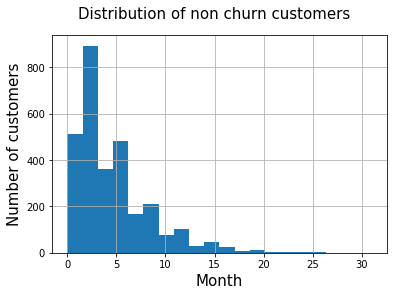

In [16]:
data_churn0['lifetime'].hist(bins=20)
plt.suptitle("Distribution of non churn customers", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of customers",fontsize=15)

Per represented Distribution of non churn customers, the most people in gym is working out less than 10 months.

#### Build a correlation matrix and display it.

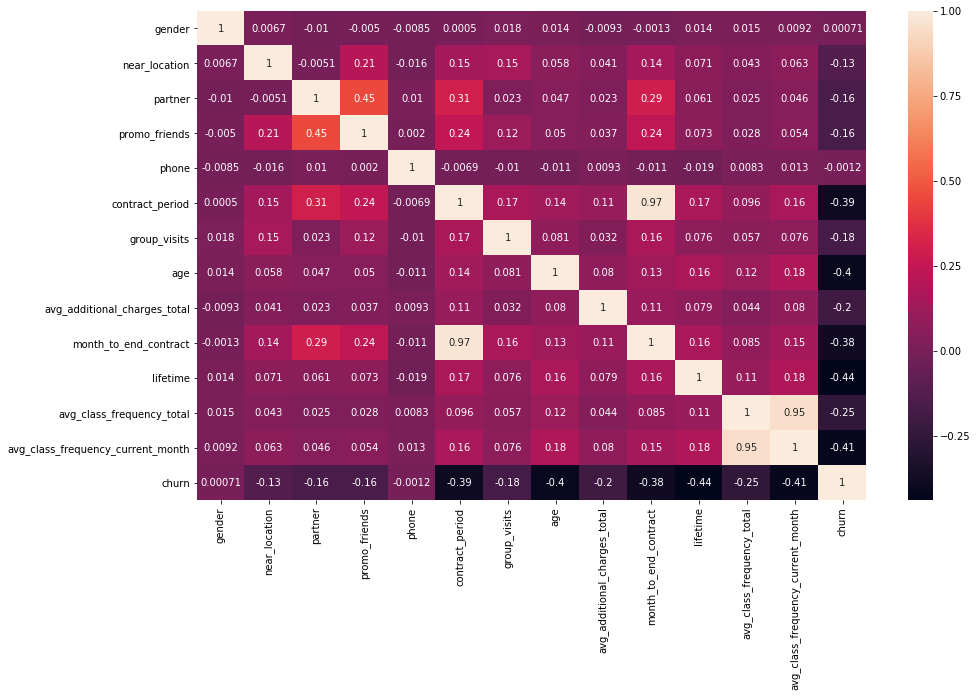

In [17]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrMatrix, annot=True,)
plt.show()

From displayed correlation matrix we can see some correllation of churn users and almost all feuters except gender and phone.

#### Conclusion

Exploratory Data Analysis (EDA) sum:
- We have 4000 lines of customers data
- Almost equal number of Mans and Womans customers with mean age 29 years,
- Almost half of our customers have discont program due to they are an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 30% of the customers originally signed up through a "bring a friend" offer.
- 90% of the customers provided their phone numbers.
- 55% of the customers signed for 1 month, 20% for 6 months and 24% for 12 months contract period.
- 41% of the customers takes part in group sessions
- The total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc. is 146 dollars
- The average frequency of visits per week over the preceding month is 1.76
- The average frequency of visits per week over the customer's lifetime is 1.86

Data dosen't have any missing values or lines

26% of customers is churn.
60% of churn customers left in first two months.

From displayed correlation matrix we can see some correllation of churn users and almost all feuters except gender and phone.

### Step 3. Build a model to predict user churn

<div class="paragraph">Build a binary classification model for customers where the target feature is the user's leaving next month.</div>
<ul>
<li>Divide the data into train and validation sets using the&nbsp;<code class="code-inline code-inline_theme_light">train_test_split()</code>&nbsp;function.</li>
<li>Train the model on the train set with two methods:
<ul>
<li>logistic regression</li>
<li>random forest</li>
</ul>
</li>
<li>Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?</li>
</ul>
<div class="paragraph">Remember to indicate the&nbsp;<code class="code-inline code-inline_theme_light">random_state</code>&nbsp;parameter when dividing data and defining the algorithm.</div>

In [18]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [19]:
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [20]:
# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# create a StandardScaler object and apply it to the train set
scaler = StandardScaler()
scaler.fit(X_train)
# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [22]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression()
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')


# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


After two models were trained, we can see that both models have almost identical metrics scores, but logistic regression performed a little bit better, than random forest.

### Step 4. Create user clusters

Step 4. Create user clusters
<div class="paragraph">Set aside the column with data on churn and identify object (user) clusters:</div>
<ul>
<li>Standardize the data.</li>
<li>Use the&nbsp;<code class="code-inline code-inline_theme_light">linkage()</code>&nbsp;function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.</li>
<li>Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be&nbsp;<code class="code-inline code-inline_theme_light">n=5</code>, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)</li>
<li>Look at the mean feature values for clusters. Does anything catch your eye?</li>
<li>Plot distributions of features for the clusters. Do you notice anything?</li>
<li>Calculate the churn rate for each cluster (use the&nbsp;<code class="code-inline code-inline_theme_light">groupby()</code>&nbsp;method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?</li>
</ul>

In [23]:
scaler = StandardScaler() # creating a scaler class object (normalizer)
x_sc = scaler.fit_transform(data.drop(columns = ['churn'])) # training the normalizer and transforming the dataset 
#print(x_sc[:10]) 

In [24]:
# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector 

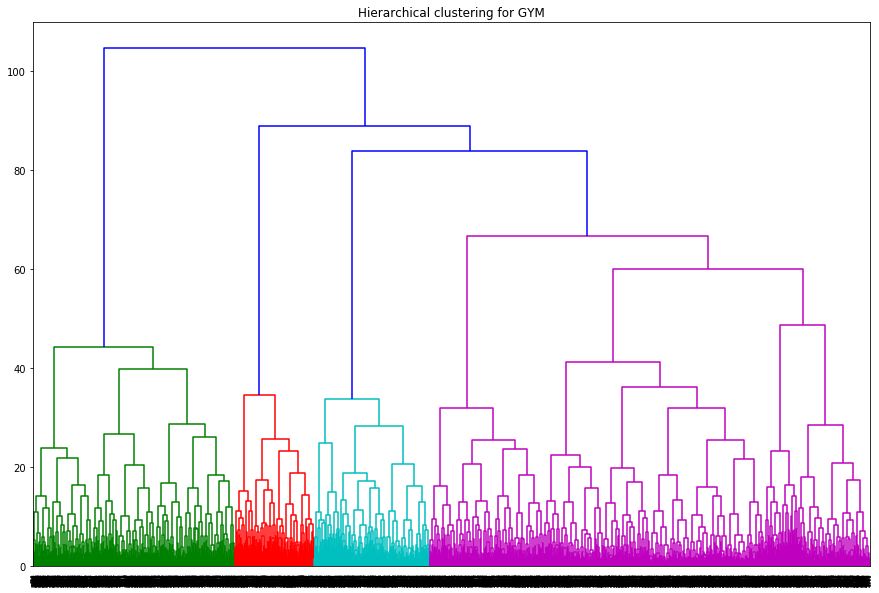

In [25]:
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

In [26]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [27]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 4,)

In [28]:
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

In [29]:
# store cluster labels into the field of our dataset
data['cluster'] = labels

In [30]:
# print the statistics of the mean feature values per cluster
data.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.543909,0.861190,0.342776,0.204910,1.0,2.395656,0.447592,30.005666,157.343528,2.234183,4.695940,2.722611,2.709277,0.092540
2,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685
3,0.487475,0.759648,0.381855,0.190928,1.0,1.903859,0.292485,28.033852,129.678002,1.808395,2.238321,1.204118,0.950537,0.560596


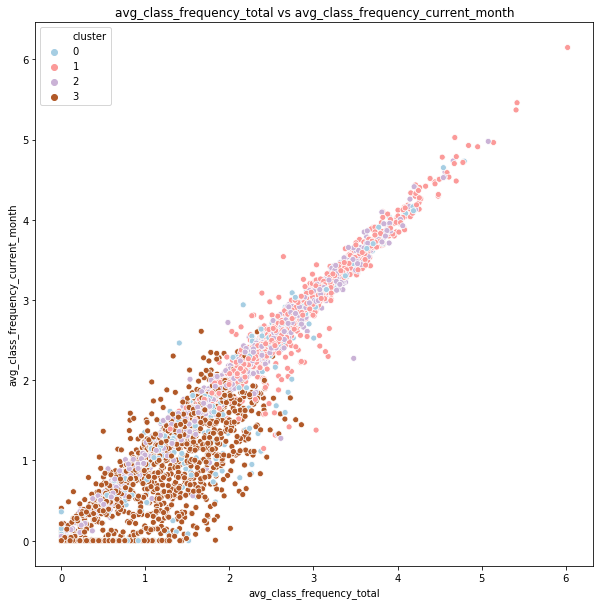

In [31]:
# render the graph for the paired "avg_class_frequency_total" and "avg_class_frequency_current_month" features
show_clusters_on_plot(data, 'avg_class_frequency_total','avg_class_frequency_current_month','cluster')

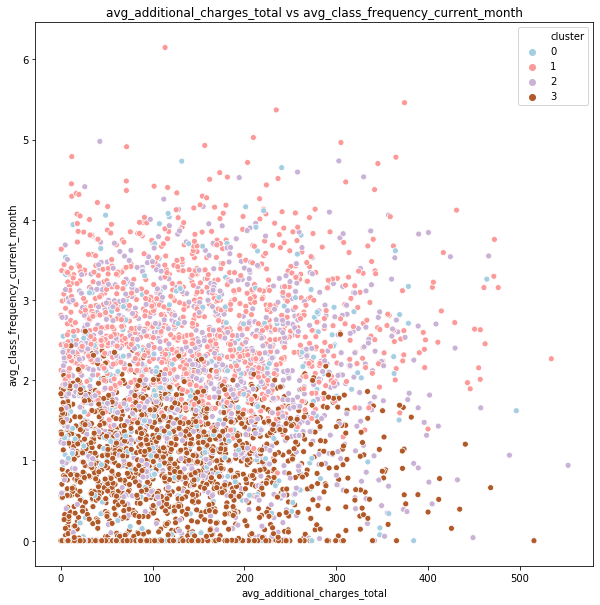

In [32]:
# render the graph for the paired "avg_additional_charges_total" and "avg_class_frequency_current_month" features
show_clusters_on_plot(data, 'avg_additional_charges_total','avg_class_frequency_current_month','cluster')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9859da0dd0>,
      dtype=object)

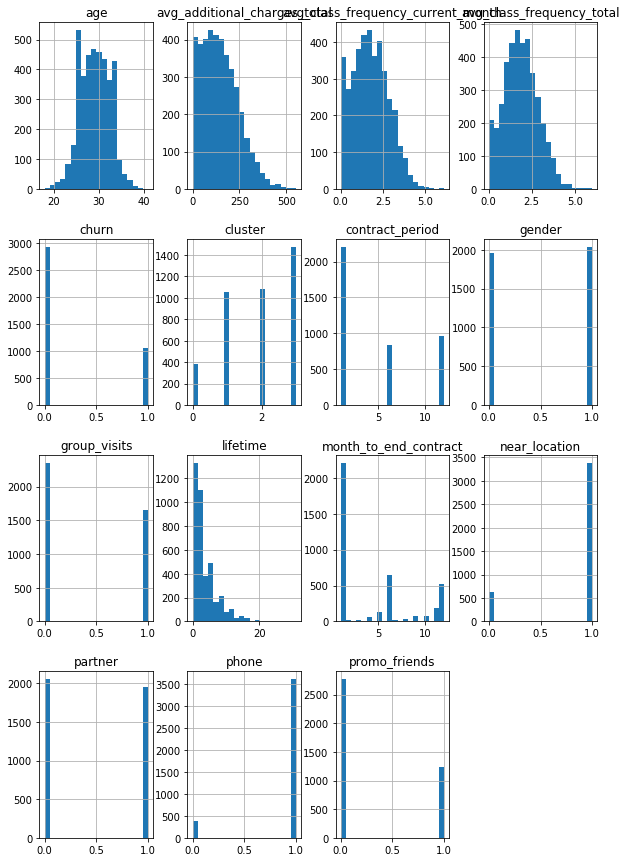

In [33]:
data.hist(bins=20,figsize=(10,15))

The statistics of the mean feature values for 4 clusters:

Cluster 2 have 56% of churn, they key charachteristics is:
- avg_class_frequency_current_month is less than 1 time.
- avg_class_frequency_total is less than 1.2 times.
- lifetime is less than 2.2 months.
- month_to_end_contract is less than 1.8 months.
- avg_additional_charges_total is less than 129 dollars.
- group_visits is less than 0.29.
- contract_period is less than 2 months.
- near_location is less than 75%

Clusters 1 and 3 have 2-9% of churn, this cluster is best gym Target Audience, they key charachteristics is:
- avg_class_frequency_current_month is more than 1.8 time.
- avg_class_frequency_total is more than 1.99 times.
- lifetime is more than 4.7 months.
- avg_additional_charges_total is more than 157 dollars.
- group_visits is more than 0.45.
- promo_friends is more than 50%.
- partner is 77%
- near_location is 94%

### Step 5. Come up with conclusions and basic recommendations

Step 5. Come up with conclusions and basic recommendations on working with customers
<div class="paragraph">Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.</div>
<div class="paragraph">&nbsp;</div>
<div class="paragraph">You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.</div>

### Step 5. Final conclusion

<p>After Investigating and Analyzing gym chain customers&nbsp;represented data, with statistical and machine learning algorithms, all users split into 4 main groups (clusters), named 0,1,2,3</p>
<p><strong>Cluster number 2 has 56% of churn customers, key characteristics represented at the end of the previous step.&nbsp;</strong></p>
<p>Recommended churn Preventive actions can be taken:</p>
<ul>
<li>When a person's&nbsp;avg class frequency for the current month is 1 or less, an automatic SMS invitation can be sent to him with the invitation to the gym it will be better if it will be a motivating phone call.</li>
<li>The same can be done with persons who have less than two months until the end of the gym contract. Maybe free personal pieces of training can be&nbsp;offered.</li>
<li>Customers that have&nbsp;avg_additional_charges_total is less than 129 dollars, can be invited to some training classes of healthy or&nbsp;sports nutrition with some sales for gym extras sales from the gym shop, it can increase customers loyalty and time they will come to the gym will be increased.</li>
<li>Customers that have&nbsp;contract_period is less than 2 months from this churn can be offered some discounts for extending the contract.</li>
</ul>
<p><strong>Clusters 1 and 3 have 2-9% of churn, this cluster is the best gym Target Audience, key characteristics represented at the end of the previous step.&nbsp;</strong></p>
<p>Recommended actions can be taken:</p>
<ul>
<li>These clusters can be used for creating look a like&nbsp;Target Audience from social networks and it can dramatically decrease waste of commercial budget.</li>
</ul>